##Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# train = pd.read_csv("train.csv")
 
# from google.colab import drive
# drive.mount('/content/drive')
train_df =pd.read_csv("../input/aidescalatingdataset/train.csv")
test =pd.read_csv("../input/test-dataset/test.csv")
print("Train shape : ",train_df.shape)

test['label'] = 2
test['indicator'] = 0
train_df['indicator'] = 1
train = pd.concat([test,train_df])
train.head()

Train shape :  (4437, 27)


,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label,indicator
0,http://www.ellesnewenglandkitchen.com/blog/200...,4049,"{""title"":""Elle s New England Kitchen Elle s Ne...",arts_entertainment,0.365831,1.217617,0.261307,0.035176,0.015075,0.005025,...,0,10,0,9492,199,6,0.045226,0.108460,2,0
1,http://www.alternet.org/story/149193/study_con...,3692,"{""url"":""alternet org story 149193 study confir...",culture_politics,0.876315,3.814208,0.589744,0.261538,0.179487,0.107692,...,1,45,0,4370,195,9,0.112821,0.106181,2,0
2,http://www.wiredberries.com/,9739,"{""title"":"" "",""body"":"" "",""url"":""wiredberries""}",?,?,1.793103,0.402299,0.183908,0.000000,0.000000,...,1,48,?,921,87,0,0.011494,1.000000,2,0
3,http://www.elements4health.com/cayenne-pepper....,1548,"{""title"":""The Health Benefits of Cayenne Peppe...",?,?,2.083333,0.636364,0.279720,0.041958,0.000000,...,0,15,0,8474,143,2,0.027972,0.064083,2,0
4,http://www.poorgirleatswell.com/2009/10/recipe...,5574,"{""title"":""Recipe Hearty Mushroom Potato Soup ""...",recreation,0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,...,1,14,0,11448,229,5,0.152838,0.087533,2,0


In [3]:
test.shape

(2958, 28)

In [4]:
train.columns

Index(['link', 'link_id', 'page_description', 'alchemy_category',
       'alchemy_category_score', 'avg_link_size', 'common_word_link_ratio_1',
       'common_word_link_ratio_2', 'common_word_link_ratio_3',
       'common_word_link_ratio_4', 'compression_ratio', 'embed_ratio',
       'frame_based', 'frame_tag_ratio', 'has_domain_link', 'html_ratio',
       'image_ratio', 'is_news', 'lengthy_link_domain', 'link_word_score',
       'news_front_page', 'non_markup_alphanumeric_characters',
       'count_of_links', 'number_of_words_in_url', 'parametrized_link_ratio',
       'spelling_mistakes_ratio', 'label', 'indicator'],
      dtype='object')

In [5]:
train.head()

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label,indicator
0,http://www.ellesnewenglandkitchen.com/blog/200...,4049,"{""title"":""Elle s New England Kitchen Elle s Ne...",arts_entertainment,0.365831,1.217617,0.261307,0.035176,0.015075,0.005025,...,0,10,0,9492,199,6,0.045226,0.108460,2,0
1,http://www.alternet.org/story/149193/study_con...,3692,"{""url"":""alternet org story 149193 study confir...",culture_politics,0.876315,3.814208,0.589744,0.261538,0.179487,0.107692,...,1,45,0,4370,195,9,0.112821,0.106181,2,0
2,http://www.wiredberries.com/,9739,"{""title"":"" "",""body"":"" "",""url"":""wiredberries""}",?,?,1.793103,0.402299,0.183908,0.000000,0.000000,...,1,48,?,921,87,0,0.011494,1.000000,2,0
3,http://www.elements4health.com/cayenne-pepper....,1548,"{""title"":""The Health Benefits of Cayenne Peppe...",?,?,2.083333,0.636364,0.279720,0.041958,0.000000,...,0,15,0,8474,143,2,0.027972,0.064083,2,0
4,http://www.poorgirleatswell.com/2009/10/recipe...,5574,"{""title"":""Recipe Hearty Mushroom Potato Soup ""...",recreation,0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,...,1,14,0,11448,229,5,0.152838,0.087533,2,0


In [6]:
# Y=train['label']
# Y.value_counts()

In [7]:
X=train;
X.head()

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label,indicator
0,http://www.ellesnewenglandkitchen.com/blog/200...,4049,"{""title"":""Elle s New England Kitchen Elle s Ne...",arts_entertainment,0.365831,1.217617,0.261307,0.035176,0.015075,0.005025,...,0,10,0,9492,199,6,0.045226,0.108460,2,0
1,http://www.alternet.org/story/149193/study_con...,3692,"{""url"":""alternet org story 149193 study confir...",culture_politics,0.876315,3.814208,0.589744,0.261538,0.179487,0.107692,...,1,45,0,4370,195,9,0.112821,0.106181,2,0
2,http://www.wiredberries.com/,9739,"{""title"":"" "",""body"":"" "",""url"":""wiredberries""}",?,?,1.793103,0.402299,0.183908,0.000000,0.000000,...,1,48,?,921,87,0,0.011494,1.000000,2,0
3,http://www.elements4health.com/cayenne-pepper....,1548,"{""title"":""The Health Benefits of Cayenne Peppe...",?,?,2.083333,0.636364,0.279720,0.041958,0.000000,...,0,15,0,8474,143,2,0.027972,0.064083,2,0
4,http://www.poorgirleatswell.com/2009/10/recipe...,5574,"{""title"":""Recipe Hearty Mushroom Potato Soup ""...",recreation,0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,...,1,14,0,11448,229,5,0.152838,0.087533,2,0


## PRE-PROCESSING EDA

## checking null values 

In [8]:
X.isna().sum()

link                                  0
link_id                               0
page_description                      0
alchemy_category                      0
alchemy_category_score                0
avg_link_size                         0
common_word_link_ratio_1              0
common_word_link_ratio_2              0
common_word_link_ratio_3              0
common_word_link_ratio_4              0
compression_ratio                     0
embed_ratio                           0
frame_based                           0
frame_tag_ratio                       0
has_domain_link                       0
html_ratio                            0
image_ratio                           0
is_news                               0
lengthy_link_domain                   0
link_word_score                       0
news_front_page                       0
non_markup_alphanumeric_characters    0
count_of_links                        0
number_of_words_in_url                0
parametrized_link_ratio               0


In [9]:
(X == "?").sum()

link                                     0
link_id                                  0
page_description                         0
alchemy_category                      2342
alchemy_category_score                2342
avg_link_size                            0
common_word_link_ratio_1                 0
common_word_link_ratio_2                 0
common_word_link_ratio_3                 0
common_word_link_ratio_4                 0
compression_ratio                        0
embed_ratio                              0
frame_based                              0
frame_tag_ratio                          0
has_domain_link                          0
html_ratio                               0
image_ratio                              0
is_news                               2843
lengthy_link_domain                      0
link_word_score                          0
news_front_page                       1248
non_markup_alphanumeric_characters       0
count_of_links                           0
number_of_w

In [10]:
X['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

<AxesSubplot:>

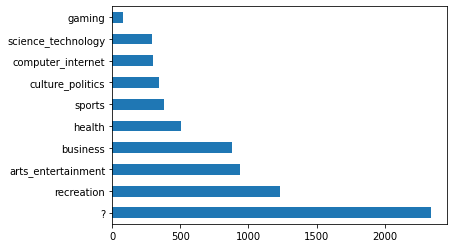

In [11]:
train['alchemy_category'].value_counts()[:10].plot(kind='barh')

In [12]:
X['alchemy_category'].value_counts

<bound method IndexOpsMixin.value_counts of 0       arts_entertainment
1         culture_politics
2                        ?
3                        ?
4               recreation
               ...        
4432                sports
4433                     ?
4434      culture_politics
4435      culture_politics
4436                sports
Name: alchemy_category, Length: 7395, dtype: object>

In [13]:
# replacing ? values with random value
X['alchemy_category'] = X['alchemy_category'].replace(to_replace ="?",value =random.choice(X['alchemy_category'].values.tolist()))
X['alchemy_category']

0       arts_entertainment
1         culture_politics
2                        ?
3                        ?
4               recreation
               ...        
4432                sports
4433                     ?
4434      culture_politics
4435      culture_politics
4436                sports
Name: alchemy_category, Length: 7395, dtype: object

In [14]:
X.columns

Index(['link', 'link_id', 'page_description', 'alchemy_category',
       'alchemy_category_score', 'avg_link_size', 'common_word_link_ratio_1',
       'common_word_link_ratio_2', 'common_word_link_ratio_3',
       'common_word_link_ratio_4', 'compression_ratio', 'embed_ratio',
       'frame_based', 'frame_tag_ratio', 'has_domain_link', 'html_ratio',
       'image_ratio', 'is_news', 'lengthy_link_domain', 'link_word_score',
       'news_front_page', 'non_markup_alphanumeric_characters',
       'count_of_links', 'number_of_words_in_url', 'parametrized_link_ratio',
       'spelling_mistakes_ratio', 'label', 'indicator'],
      dtype='object')

In [15]:
X['alchemy_category_score'] = X['alchemy_category_score'].replace(to_replace ="?",value = (X['alchemy_category_score']!='?').mean())
X['alchemy_category_score'] = X['alchemy_category_score'].astype('float')

In [16]:
print('median: ',X['alchemy_category_score'].median())
print('mean : ',X['alchemy_category_score'].mean())

median:  0.6832995267072346
mean :  0.6286593365041708


In [17]:
X['news_front_page'] = X['news_front_page'].replace(to_replace ="?",value =0)
X['is_news'] = X['is_news'].replace(to_replace ="?",value =1)

In [18]:
X.dtypes

link                                   object
link_id                                 int64
page_description                       object
alchemy_category                       object
alchemy_category_score                float64
avg_link_size                         float64
common_word_link_ratio_1              float64
common_word_link_ratio_2              float64
common_word_link_ratio_3              float64
common_word_link_ratio_4              float64
compression_ratio                     float64
embed_ratio                           float64
frame_based                             int64
frame_tag_ratio                       float64
has_domain_link                         int64
html_ratio                            float64
image_ratio                           float64
is_news                                object
lengthy_link_domain                     int64
link_word_score                         int64
news_front_page                        object
non_markup_alphanumeric_characters

In [19]:
X['is_news']=X['is_news'].astype('float')
X['news_front_page']=X['news_front_page'].astype('float')

In [20]:
(X == "?").sum()

link                                     0
link_id                                  0
page_description                         0
alchemy_category                      2342
alchemy_category_score                   0
avg_link_size                            0
common_word_link_ratio_1                 0
common_word_link_ratio_2                 0
common_word_link_ratio_3                 0
common_word_link_ratio_4                 0
compression_ratio                        0
embed_ratio                              0
frame_based                              0
frame_tag_ratio                          0
has_domain_link                          0
html_ratio                               0
image_ratio                              0
is_news                                  0
lengthy_link_domain                      0
link_word_score                          0
news_front_page                          0
non_markup_alphanumeric_characters       0
count_of_links                           0
number_of_w

In [21]:
X.head()

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label,indicator
0,http://www.ellesnewenglandkitchen.com/blog/200...,4049,"{""title"":""Elle s New England Kitchen Elle s Ne...",arts_entertainment,0.365831,1.217617,0.261307,0.035176,0.015075,0.005025,...,0,10,0.0,9492,199,6,0.045226,0.108460,2,0
1,http://www.alternet.org/story/149193/study_con...,3692,"{""url"":""alternet org story 149193 study confir...",culture_politics,0.876315,3.814208,0.589744,0.261538,0.179487,0.107692,...,1,45,0.0,4370,195,9,0.112821,0.106181,2,0
2,http://www.wiredberries.com/,9739,"{""title"":"" "",""body"":"" "",""url"":""wiredberries""}",?,0.683300,1.793103,0.402299,0.183908,0.000000,0.000000,...,1,48,0.0,921,87,0,0.011494,1.000000,2,0
3,http://www.elements4health.com/cayenne-pepper....,1548,"{""title"":""The Health Benefits of Cayenne Peppe...",?,0.683300,2.083333,0.636364,0.279720,0.041958,0.000000,...,0,15,0.0,8474,143,2,0.027972,0.064083,2,0
4,http://www.poorgirleatswell.com/2009/10/recipe...,5574,"{""title"":""Recipe Hearty Mushroom Potato Soup ""...",recreation,0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,...,1,14,0.0,11448,229,5,0.152838,0.087533,2,0


## One hot encoding



In [22]:
#one-hot encoding for categorical data 
column_names_to_one_hot = ["alchemy_category"]
X = pd.get_dummies(X, columns=column_names_to_one_hot)
X.head()

,link,link_id,page_description,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,http://www.ellesnewenglandkitchen.com/blog/200...,4049,"{""title"":""Elle s New England Kitchen Elle s Ne...",0.365831,1.217617,0.261307,0.035176,0.015075,0.005025,0.488917,...,0,0,0,0,0,0,0,0,0,0
1,http://www.alternet.org/story/149193/study_con...,3692,"{""url"":""alternet org story 149193 study confir...",0.876315,3.814208,0.589744,0.261538,0.179487,0.107692,0.452856,...,1,0,0,0,0,0,0,0,0,0
2,http://www.wiredberries.com/,9739,"{""title"":"" "",""body"":"" "",""url"":""wiredberries""}",0.683300,1.793103,0.402299,0.183908,0.000000,0.000000,21.000000,...,0,0,0,0,0,0,0,0,0,0
3,http://www.elements4health.com/cayenne-pepper....,1548,"{""title"":""The Health Benefits of Cayenne Peppe...",0.683300,2.083333,0.636364,0.279720,0.041958,0.000000,0.447265,...,0,0,0,0,0,0,0,0,0,0
4,http://www.poorgirleatswell.com/2009/10/recipe...,5574,"{""title"":""Recipe Hearty Mushroom Potato Soup ""...",0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,0.460235,...,0,0,0,0,1,0,0,0,0,0


## dropping column with all 0 values

In [23]:
len(X.columns)

41

In [24]:
for x in X:
  if (len(X[x].unique())==1):
    print(x)
    X.drop(axis="columns", labels=x, inplace=True)

    

frame_based
is_news


In [25]:
len(X.columns)

39

In [26]:
X.shape

(7395, 39)

In [27]:
X.columns

Index(['link', 'link_id', 'page_description', 'alchemy_category_score',
       'avg_link_size', 'common_word_link_ratio_1', 'common_word_link_ratio_2',
       'common_word_link_ratio_3', 'common_word_link_ratio_4',
       'compression_ratio', 'embed_ratio', 'frame_tag_ratio',
       'has_domain_link', 'html_ratio', 'image_ratio', 'lengthy_link_domain',
       'link_word_score', 'news_front_page',
       'non_markup_alphanumeric_characters', 'count_of_links',
       'number_of_words_in_url', 'parametrized_link_ratio',
       'spelling_mistakes_ratio', 'label', 'indicator', 'alchemy_category_?',
       'alchemy_category_arts_entertainment', 'alchemy_category_business',
       'alchemy_category_computer_internet',
       'alchemy_category_culture_politics', 'alchemy_category_gaming',
       'alchemy_category_health', 'alchemy_category_law_crime',
       'alchemy_category_recreation', 'alchemy_category_religion',
       'alchemy_category_science_technology', 'alchemy_category_sports',
    

## Removing outliers

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.



In [28]:
X['alchemy_category_score'].unique()

array([0.365831  , 0.876315  , 0.68329953, ..., 0.159831  , 0.84594   ,
       0.93526   ])

In [29]:
def outlierPlot(p):
    sns.boxplot(x=p)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(p)

def checkOutliers(p):
  Q1 = p.quantile(0.25)
  Q3 = p.quantile(0.75)
  IQR = Q3 - Q1
  print((p < (Q1 - 1.5 * IQR) ) | (p  > (Q3 + 1.5 * IQR)))

def removeOutliers(p):
  Q1 = p.quantile(0.25)
  Q3 = p.quantile(0.75)
  IQR = Q3 - Q1
  p = p[~((p < (Q1 - 1.5 * IQR)) |(p > (Q3 + 1.5 * IQR)))]
  return p


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


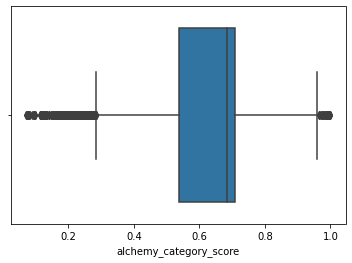

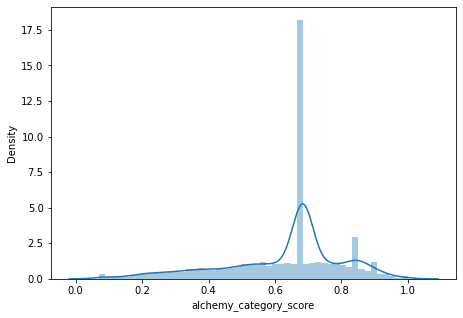

In [30]:
p = X['alchemy_category_score']
outlierPlot(p)

In [31]:
p = X["alchemy_category_score"]

In [32]:
checkOutliers(p)

0       False
1       False
2       False
3       False
4       False
        ...  
4432    False
4433    False
4434     True
4435    False
4436    False
Name: alchemy_category_score, Length: 7395, dtype: bool



As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [33]:
p.shape

(7395,)

In [34]:
p = removeOutliers(p)

In [35]:
checkOutliers(p)

0        True
1       False
2       False
3       False
4       False
        ...  
4430    False
4432    False
4433    False
4435    False
4436     True
Name: alchemy_category_score, Length: 6885, dtype: bool


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


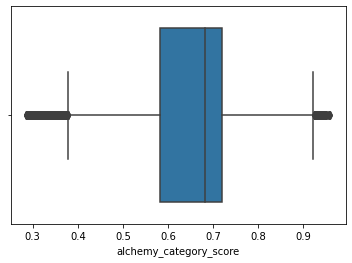

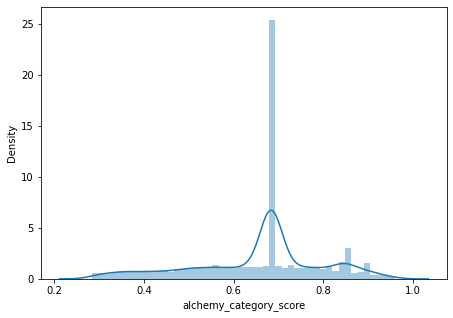

In [36]:
outlierPlot(p)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


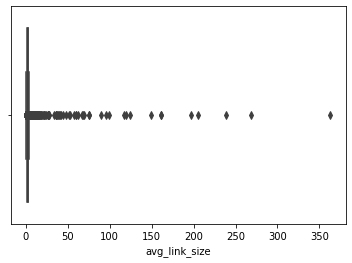

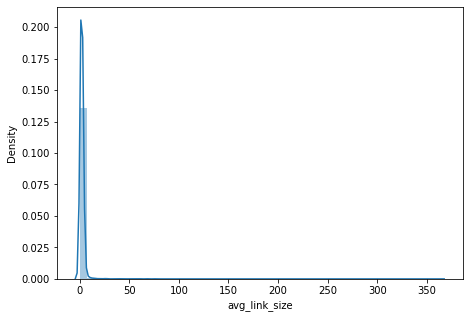

In [37]:
q = X['avg_link_size']
outlierPlot(q)

In [38]:
checkOutliers(q)

0       False
1       False
2       False
3       False
4       False
        ...  
4432    False
4433    False
4434    False
4435    False
4436    False
Name: avg_link_size, Length: 7395, dtype: bool


In [39]:
q = removeOutliers(q)

In [40]:
checkOutliers(q)

0       False
1       False
2       False
3       False
4       False
        ...  
4432    False
4433    False
4434    False
4435    False
4436    False
Name: avg_link_size, Length: 6938, dtype: bool


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


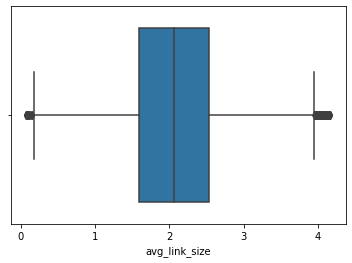

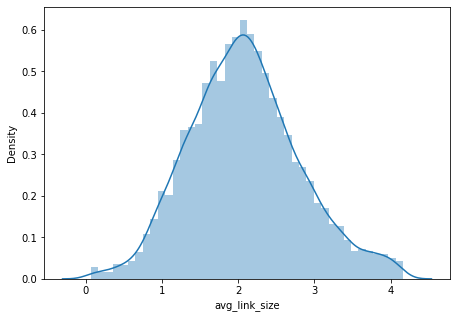

In [41]:
outlierPlot(q)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


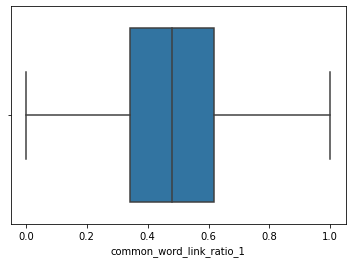

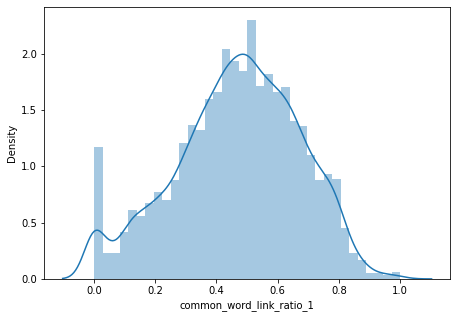

In [42]:
r = X['common_word_link_ratio_1']
outlierPlot(r)

In [43]:
checkOutliers(r)

0       False
1       False
2       False
3       False
4       False
        ...  
4432    False
4433    False
4434    False
4435    False
4436    False
Name: common_word_link_ratio_1, Length: 7395, dtype: bool


In [44]:
r = removeOutliers(r)

In [45]:
checkOutliers(r)

0       False
1       False
2       False
3       False
4       False
        ...  
4432    False
4433    False
4434    False
4435    False
4436    False
Name: common_word_link_ratio_1, Length: 7395, dtype: bool


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


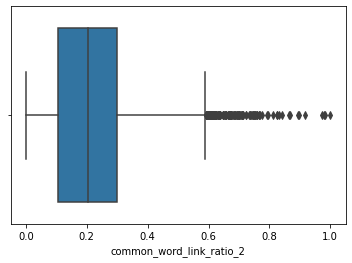

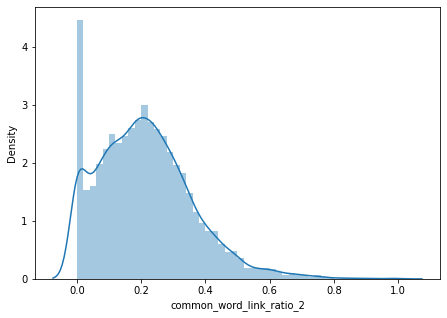

In [46]:
s = X['common_word_link_ratio_2']
outlierPlot(s)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


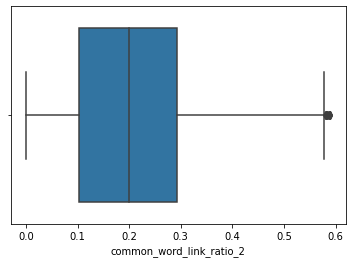

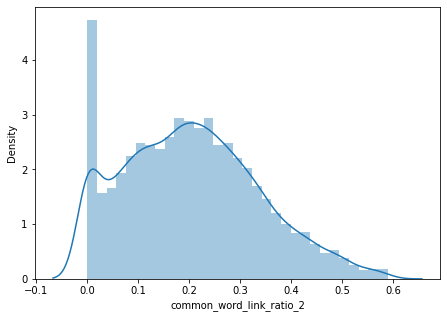

In [47]:
s = removeOutliers(s)
outlierPlot(s)

<bound method Series.count of 0       0.005025
1       0.107692
2       0.000000
3       0.000000
4       0.148472
          ...   
4432    0.079545
4433    0.000000
4434    0.000000
4435    0.048611
4436    0.000000
Name: common_word_link_ratio_4, Length: 7395, dtype: float64>


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


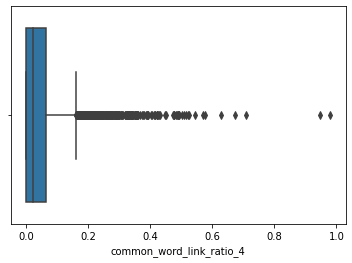

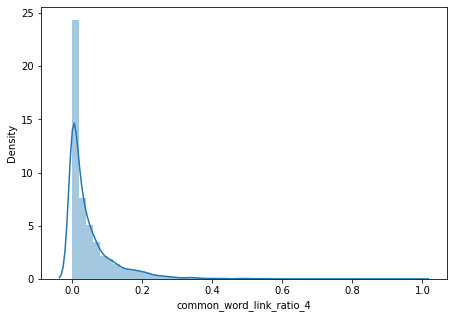

In [48]:
t = X['common_word_link_ratio_4']
print(t.count)
outlierPlot(t)

<bound method Series.count of 0       0.005025
1       0.107692
2       0.000000
3       0.000000
4       0.148472
          ...   
4432    0.079545
4433    0.000000
4434    0.000000
4435    0.048611
4436    0.000000
Name: common_word_link_ratio_4, Length: 6820, dtype: float64>


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


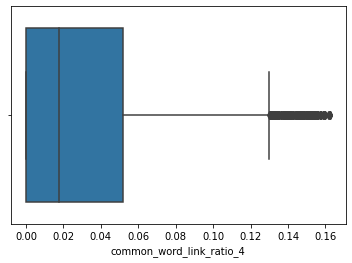

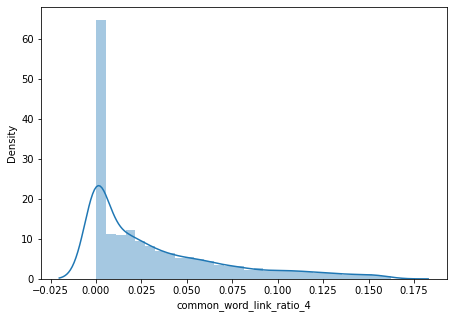

In [49]:
t = removeOutliers(t)
print(t.count)
outlierPlot(t)

In [50]:
u = X['embed_ratio']
v = X['compression_ratio']
print(len(u))
print(len(v))
u = removeOutliers(u)
u = removeOutliers(v)
print(len(u))
print(len(v))

7395
7395
6327
7395


# NLP Pre Processsing

In [51]:
from urllib.parse import urlparse
X.link=X.link.apply(lambda x:urlparse(x).netloc)
X.link

0       www.ellesnewenglandkitchen.com
1                     www.alternet.org
2                 www.wiredberries.com
3              www.elements4health.com
4             www.poorgirleatswell.com
                     ...              
4432                 newsfeed.time.com
4433                  tastykitchen.com
4434                        ecoble.com
4435            www.huffingtonpost.com
4436                  www.bromygod.com
Name: link, Length: 7395, dtype: object

In [52]:
X.head()

,link,link_id,page_description,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,www.ellesnewenglandkitchen.com,4049,"{""title"":""Elle s New England Kitchen Elle s Ne...",0.365831,1.217617,0.261307,0.035176,0.015075,0.005025,0.488917,...,0,0,0,0,0,0,0,0,0,0
1,www.alternet.org,3692,"{""url"":""alternet org story 149193 study confir...",0.876315,3.814208,0.589744,0.261538,0.179487,0.107692,0.452856,...,1,0,0,0,0,0,0,0,0,0
2,www.wiredberries.com,9739,"{""title"":"" "",""body"":"" "",""url"":""wiredberries""}",0.683300,1.793103,0.402299,0.183908,0.000000,0.000000,21.000000,...,0,0,0,0,0,0,0,0,0,0
3,www.elements4health.com,1548,"{""title"":""The Health Benefits of Cayenne Peppe...",0.683300,2.083333,0.636364,0.279720,0.041958,0.000000,0.447265,...,0,0,0,0,0,0,0,0,0,0
4,www.poorgirleatswell.com,5574,"{""title"":""Recipe Hearty Mushroom Potato Soup ""...",0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,0.460235,...,0,0,0,0,1,0,0,0,0,0


In [53]:
X['page_description'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
X['page_description'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)
X['page_description'].replace(to_replace=r'"body":',value="",inplace=True,regex=True)
X['page_description'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
X['page_description'].head()

0    "Elle s New England Kitchen Elle s New England...
1    "alternet org story 149193 study confirms that...
2                               " "," ","wiredberries"
3    "The Health Benefits of Cayenne Pepper ","Brie...
4    "Recipe Hearty Mushroom Potato Soup ","If you ...
Name: page_description, dtype: object

In [54]:
X.head()

,link,link_id,page_description,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,www.ellesnewenglandkitchen.com,4049,"""Elle s New England Kitchen Elle s New England...",0.365831,1.217617,0.261307,0.035176,0.015075,0.005025,0.488917,...,0,0,0,0,0,0,0,0,0,0
1,www.alternet.org,3692,"""alternet org story 149193 study confirms that...",0.876315,3.814208,0.589744,0.261538,0.179487,0.107692,0.452856,...,1,0,0,0,0,0,0,0,0,0
2,www.wiredberries.com,9739,""" "","" "",""wiredberries""",0.683300,1.793103,0.402299,0.183908,0.000000,0.000000,21.000000,...,0,0,0,0,0,0,0,0,0,0
3,www.elements4health.com,1548,"""The Health Benefits of Cayenne Pepper "",""Brie...",0.683300,2.083333,0.636364,0.279720,0.041958,0.000000,0.447265,...,0,0,0,0,0,0,0,0,0,0
4,www.poorgirleatswell.com,5574,"""Recipe Hearty Mushroom Potato Soup "",""If you ...",0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,0.460235,...,0,0,0,0,1,0,0,0,0,0


1. The **isalpha()** method returns True if all the characters are alphabet letters (a-z).Example of characters that are not alphabet letters: (space)!#%&? etc.

2. **Stop Words:** A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 
We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words.

3. **word_tokenize:** In Natural Language Processing, tokenization divides a string into a list of tokens. Tokens come in handy when finding valuable patterns and helping to replace sensitive data components with non-sensitive ones. word_tokenize is a function in Python that splits a given sentence into words using the NLTK library.

In [55]:
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
wordnet = WordNetLemmatizer()
from nltk.corpus import stopwords
nltk.download('stopwords')

def textCleaning(df,column_name):
    cleanList = list()
    lines = df[column_name].values.tolist()
    for text in lines:
        text = text.lower()
        words = word_tokenize(text)
        stop_words = set(stopwords.words("english"))
        words = [w for w in words if not w in stop_words]
        words = [w for w in words if w.isalpha()]
        words = ' '.join(words)
        cleanList.append(words)
    return cleanList

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
pageDescription = textCleaning(X,"page_description")
pageDescription[0:2]

['elle new england kitchen elle new england kitchen weeks ago sarah homemade asked like start making recipes together would blog experiences course said yes sarah sweetheart like baking friend kitchen except west coast east coast one two month stay tuned first one decided try pita bread great recipe dough dream work needed add flour kneading quite sticky get texture right good time consuming part set dough aside rise got minute rise minute rest another minute rest baking take minutes bake makes right even better rip one open law legally required rip open piece bread hot oven even causes acute pain digits rip one open get aroma yeasty heavenly steamy bread even need butter enjoy although pretty sure law somewhere hot bread butter going together come think also law making blog posts ramble recipe found brown eyed baker used kitchenaid stand mixer let kneading ten minutes addition cup flour dough perfect doubled recipe get pita breads family every one kids pita bread butter wait two sons 

# TF-IDF vectorization

TF-IDF stands for Term Frequency — Inverse Document Frequency and is a statistic that aims to better define how important a word is for a document, while also taking into account the relation to other documents from the same corpus.

The rationale behind this is the following:


*   a word that frequently appears in a document has more relevancy for that document, meaning that there is higher probability that the document is about or in relation to that specific word
*   a word that frequently appears in more documents may prevent us from finding the right document in a collection; the word is relevant either for all documents or for none. Either way, it will not help us filter out a single document or a small subset of documents from the whole set.

**TF-IDF is a score which is applied to every word in every document in our dataset. And for every word, the TF-IDF value increases with every appearance of the word in a document, but is gradually decreased with every appearance in other documents.**







WHY TD-IDF over BoW?

the initial step of bag-of-words acts as a downside because it emphasizes words only based on counts. To overcome this, a simple twist to bag-of-words introduces the tf-idf approach.

Unlike, bag-of-words, tf-idf creates a normalized count where each word count is divided by the number of documents this word appears in.



> **bow(w, d) = # times word w appears in document d.**

> ***tf-idf(w, d) = bow(w, d) x N / (# documents in which word w appears)***




min_df is used for removing terms that appear too infrequently. For example:

min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".

min_df = 1 means "ignore terms that appear in less than 1 documents".

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
TV = TfidfVectorizer(min_df=1)  

In [58]:
def chkNonzero(df,col):
    for i in df[col+'_0']: # checking non null values for words in document 1
      if(i != 0.00):
        print(i)

In [59]:
Z = TV.fit_transform(pageDescription).toarray()
arrayCols = len(Z[0])
print('Shape : ',np.shape(Z),'\n')
columns = [f'pageDescription_{num}' for num in range(arrayCols)]
df_pageDescription =  pd.DataFrame(Z, columns=columns)
chkNonzero(df_pageDescription,'pageDescription')

Shape :  (7395, 78185) 

0.0025915282530577324
0.04105453632902744
0.002596059771451365
0.05913979252219915
0.02675493944400716
0.012818520847319492
0.015283500466449879
0.018359562050246428
0.09084697249475217
0.017480213818118352
0.02585804919241791
0.03645746146791632
0.07530509381003035
0.03264670223163986
0.035524425891513264
0.08208210230742576
0.29206593872035475


In [60]:
df_pageDescription.shape

(7395, 78185)

# feature scaling and joining vectorize data with other feature columns

In [61]:
X.head()

,link,link_id,page_description,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,www.ellesnewenglandkitchen.com,4049,"""Elle s New England Kitchen Elle s New England...",0.365831,1.217617,0.261307,0.035176,0.015075,0.005025,0.488917,...,0,0,0,0,0,0,0,0,0,0
1,www.alternet.org,3692,"""alternet org story 149193 study confirms that...",0.876315,3.814208,0.589744,0.261538,0.179487,0.107692,0.452856,...,1,0,0,0,0,0,0,0,0,0
2,www.wiredberries.com,9739,""" "","" "",""wiredberries""",0.683300,1.793103,0.402299,0.183908,0.000000,0.000000,21.000000,...,0,0,0,0,0,0,0,0,0,0
3,www.elements4health.com,1548,"""The Health Benefits of Cayenne Pepper "",""Brie...",0.683300,2.083333,0.636364,0.279720,0.041958,0.000000,0.447265,...,0,0,0,0,0,0,0,0,0,0
4,www.poorgirleatswell.com,5574,"""Recipe Hearty Mushroom Potato Soup "",""If you ...",0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,0.460235,...,0,0,0,0,1,0,0,0,0,0


In [62]:
len(X.columns)

39

In [63]:
X.columns

Index(['link', 'link_id', 'page_description', 'alchemy_category_score',
       'avg_link_size', 'common_word_link_ratio_1', 'common_word_link_ratio_2',
       'common_word_link_ratio_3', 'common_word_link_ratio_4',
       'compression_ratio', 'embed_ratio', 'frame_tag_ratio',
       'has_domain_link', 'html_ratio', 'image_ratio', 'lengthy_link_domain',
       'link_word_score', 'news_front_page',
       'non_markup_alphanumeric_characters', 'count_of_links',
       'number_of_words_in_url', 'parametrized_link_ratio',
       'spelling_mistakes_ratio', 'label', 'indicator', 'alchemy_category_?',
       'alchemy_category_arts_entertainment', 'alchemy_category_business',
       'alchemy_category_computer_internet',
       'alchemy_category_culture_politics', 'alchemy_category_gaming',
       'alchemy_category_health', 'alchemy_category_law_crime',
       'alchemy_category_recreation', 'alchemy_category_religion',
       'alchemy_category_science_technology', 'alchemy_category_sports',
    

In [64]:
# dropping few unrelated columns
X.drop(axis="columns", labels="link_id", inplace=True)
X.drop(axis="columns", labels="page_description", inplace=True)
X.drop(axis="columns", labels="link", inplace=True)
X.drop(axis="columns", labels="label", inplace=True)
X.drop(axis="columns", labels="indicator", inplace=True)

In [65]:
X.head()

,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,embed_ratio,frame_tag_ratio,has_domain_link,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,0.365831,1.217617,0.261307,0.035176,0.015075,0.005025,0.488917,0.0,0.031139,0,...,0,0,0,0,0,0,0,0,0,0
1,0.876315,3.814208,0.589744,0.261538,0.179487,0.107692,0.452856,0.0,0.029478,0,...,1,0,0,0,0,0,0,0,0,0
2,0.683300,1.793103,0.402299,0.183908,0.000000,0.000000,21.000000,-1.0,0.007916,0,...,0,0,0,0,0,0,0,0,0,0
3,0.683300,2.083333,0.636364,0.279720,0.041958,0.000000,0.447265,0.0,0.029221,0,...,0,0,0,0,0,0,0,0,0,0
4,0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,0.460235,0.0,0.022243,0,...,0,0,0,0,1,0,0,0,0,0


When data contains outliers, StandardScaler can often be mislead. In such cases, it is better to use a scaler that is robust against outliers.

In [66]:
X.head()

,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,embed_ratio,frame_tag_ratio,has_domain_link,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,0.365831,1.217617,0.261307,0.035176,0.015075,0.005025,0.488917,0.0,0.031139,0,...,0,0,0,0,0,0,0,0,0,0
1,0.876315,3.814208,0.589744,0.261538,0.179487,0.107692,0.452856,0.0,0.029478,0,...,1,0,0,0,0,0,0,0,0,0
2,0.683300,1.793103,0.402299,0.183908,0.000000,0.000000,21.000000,-1.0,0.007916,0,...,0,0,0,0,0,0,0,0,0,0
3,0.683300,2.083333,0.636364,0.279720,0.041958,0.000000,0.447265,0.0,0.029221,0,...,0,0,0,0,0,0,0,0,0,0
4,0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,0.460235,0.0,0.022243,0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
#robust scaling is used to handle outliers
import pandas as pd
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [68]:
X.head()

,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,embed_ratio,frame_tag_ratio,has_domain_link,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,-1.872733,-0.849062,-0.797059,-0.858996,-0.481969,-0.264308,0.038624,0.0,-0.325556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.138590,1.683237,0.391921,0.303407,0.997738,1.313617,-0.227294,0.0,-0.362489,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,-0.287824,-0.286650,-0.095236,-0.617647,-0.341540,151.288241,-1.0,-0.842128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,-0.004781,0.560692,0.396773,-0.240025,-0.341540,-0.268525,0.0,-0.368220,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.378415,-0.236418,0.707278,0.552488,1.033008,1.940367,-0.172879,0.0,-0.523436,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


we are concatenating all the columns obtained after the TD-IDF

In [69]:
X.reset_index(inplace=True, drop=True)

In [70]:
horizontal_concat = pd.concat([df_pageDescription,X], axis=1)

In [71]:
horizontal_concat.shape

(7395, 78219)

In [72]:
horizontal_concat.tail()

,pageDescription_0,pageDescription_1,pageDescription_2,pageDescription_3,pageDescription_4,pageDescription_5,pageDescription_6,pageDescription_7,pageDescription_8,pageDescription_9,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
7390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Train-Test Split

In [73]:
# import numpy as np
# from sklearn.model_selection import train_test_split

In [74]:
# X_train, X_test, y_train, y_test = train_test_split(horizontal_concat, Y, test_size=0.33, random_state=42)

In [75]:
# print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

In [76]:
# y_train

In [77]:
X_test_df = horizontal_concat.iloc[:2958,:]
X_train_df  = horizontal_concat.iloc[2958:,:]
print("Shape of new dataframes - {} , {}".format(X_test_df.shape, X_train_df.shape))

Y_train = train_df['label']
print("Y_train_df shape : ",Y_train.shape)

Shape of new dataframes - (2958, 78219) , (4437, 78219)
Y_train_df shape :  (4437,)


# **LOGISTIC REGRESSION**

In [78]:
"""using logistic regression"""
# from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
# logreg = LogisticRegression(max_iter = 1500)

# fit the model with data
# logreg.fit(X_train_df, Y_train)

#[:,1] this is applied to take positive probablities
# y_pred_logreg=logreg.predict_proba(X_test_df)[:,1]

'using logistic regression'

# RANDOM FOREST

In [79]:
# importing random forest classifier from assemble module
# from sklearn.ensemble import RandomForestClassifier

In [80]:
# creating a RF classifier
# clf = RandomForestClassifier(n_estimators = 10000) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
# clf.fit(X_train_df, Y_train)

# performing predictions on the test dataset
# y_pred = clf.predict_proba(X_test_df)[:, 1]

# **XG BOOST**

In [81]:
# import xgboost as xgb

# clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
#                         subsample=0.8, nthread=10, learning_rate=0.1)
# clf.fit(X_train_df, Y_train)

# y_pred_xgboost= clf.predict_proba(X_test_df)[:,1]

# **LINEAR SVM**

In [82]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_df, Y_train)

y_pred_svm = clf.predict_proba(X_test_df)[:,1]

In [83]:
# y_pred
# y_pred_logreg
# y_pred_xgboost
y_pred_svm

array([0.96302463, 0.15398492, 0.306727  , ..., 0.25478045, 0.37425205,
       0.23479418])

In [84]:
sample_sum=pd.read_csv("../input/aid-escalating-internet-coverage/sample_submission.csv")
sample_sum["label"]=y_pred_svm
sample_sum.to_csv("./sum.csv",index=False)
